In [1]:
#实验要求：使用加州大学机器学习库的酒数据集(https://archive-beta.ics.uci.edu/dataset/186/wine+quality)包含
#了1599种不同红酒的11种物理化学属性，每种酒的质量由真人打分，分数范围从0到10,0代表质量最差，10代表最好
#现在希望基于已有酒的物理化学属性来预测未知酒的质量，因此该问题可以看作一个回归问题。
#训练数据包含的属性有：非挥发性酸、挥发性酸、柠檬酸、剩余糖分、氯化物、单体硫、总二氧化硫、密度、pH值、
#硫酸盐、酒精含量和质量。
#可以把质量看成目标变量，其他属性看成自变量进行学习

#实验任务：
#1、从winequality-red.csv文件中读入输入到一个Pandas对象中，并查看数据的基本情况

#2、分析自变量与目标变量（质量）的相关性


#3、通过散点图重点分析酒精含量与质量的相关性、挥发性酸与质量的相关性，可以得出什么结论？


#4、将数据集按75%和25%的比例分成训练集和测试集，进行回归分析，并给出模型训练的性能评估


#5、思考：该如果改进模型学习的效果？

In [2]:
#分类问题示例：使用逻辑回归模型对鸢尾花数据集分类，实验：使用逻辑回归模型对肿瘤数据集分类

### 1、从winequality-red.csv文件中读入输入到一个Pandas对象中，并查看数据的基本情况

In [3]:
import pandas as pd

winequality = pd.read_csv('winequality-red.csv',sep=';')
winequality.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [2]:
# 查看数据的基本情况
winequality.info()   # 查看数据的基本信息，比如数据类型和缺失值情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
winequality.describe()  # 查看数据的统计摘要信息，比如平均值、最大值、最小值等

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### 2、分析自变量与目标变量（质量）的相关性

In [12]:
# 计算相关系数
winequality.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [5]:
winequality.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

### 3、通过散点图重点分析酒精含量与质量的相关性、挥发性酸与质量的相关性，可以得出什么结论？

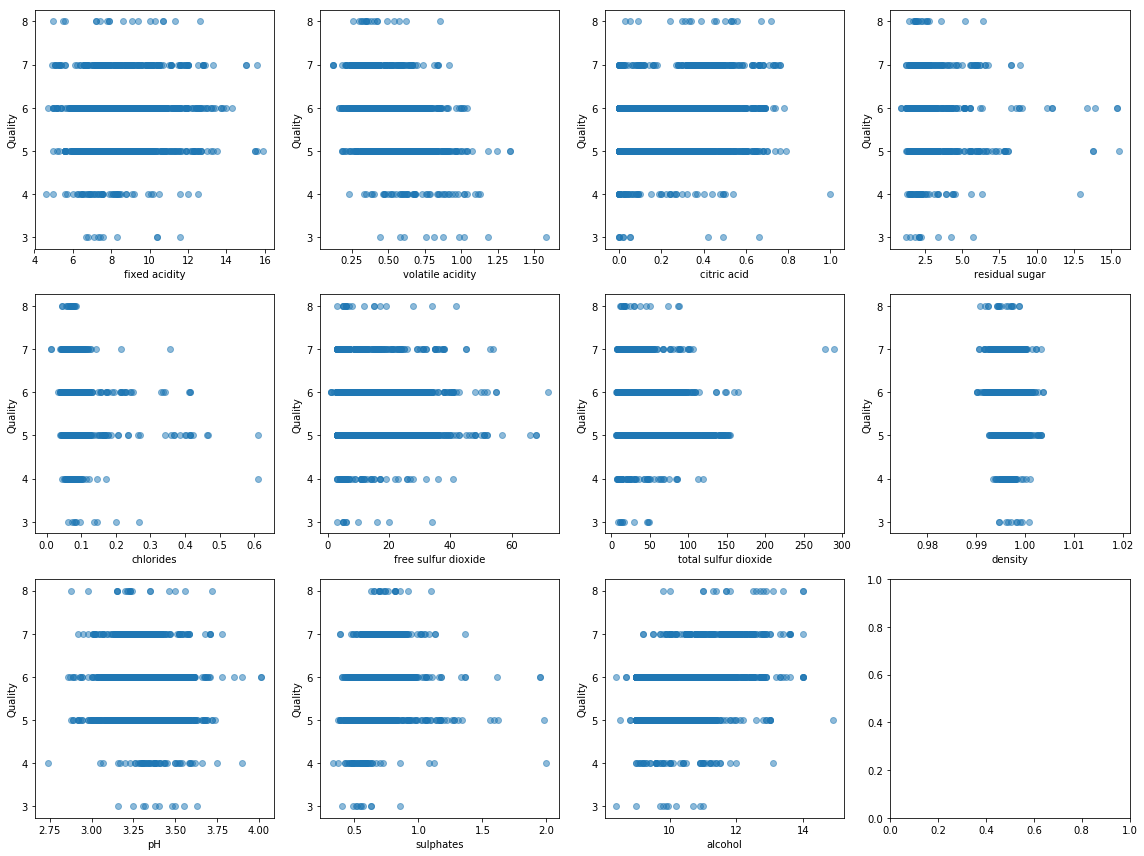

In [6]:
import matplotlib.pyplot as plt

# 设置绘图布局
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

# 遍历每个特征并绘制散点图
for i, column in enumerate(winequality.columns[:-1]):  # 最后一列是质量，不需要绘制
    row = i // 4
    col = i % 4
    axs[row, col].scatter(winequality[column], winequality['quality'], alpha=0.5)
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Quality')

plt.tight_layout()
plt.show()


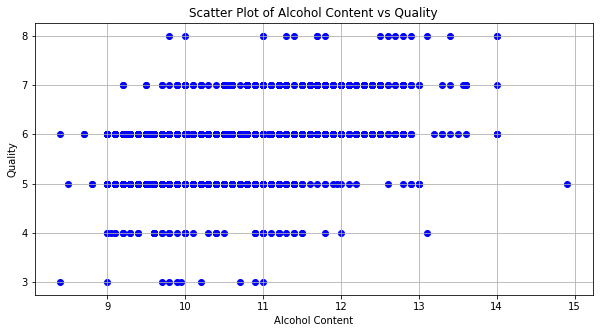

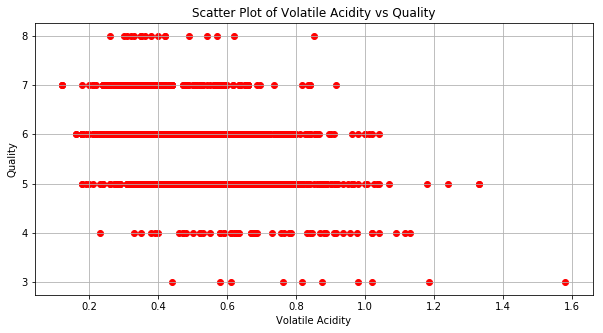

In [7]:
import matplotlib.pyplot as plt

# 绘制酒精含量与质量的散点图
plt.figure(figsize=(10, 5))
plt.scatter(winequality['alcohol'], winequality['quality'], color='blue')
plt.title('Scatter Plot of Alcohol Content vs Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.grid(True)
plt.show()

# 绘制挥发性酸与质量的散点图
plt.figure(figsize=(10, 5))
plt.scatter(winequality['volatile acidity'], winequality['quality'], color='red')
plt.title('Scatter Plot of Volatile Acidity vs Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.grid(True)
plt.show()


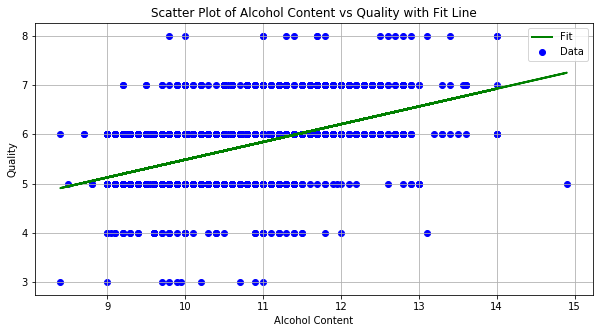

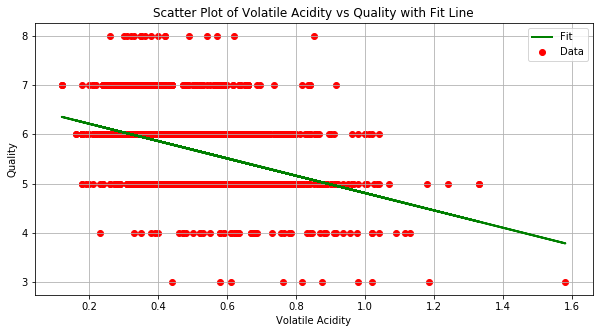

In [23]:
from sklearn.linear_model import LinearRegression

# 使用线性回归拟合酒精含量与质量的数据
alcohol = winequality['alcohol'].values.reshape(-1, 1)
quality = winequality['quality'].values.reshape(-1, 1)
reg_alcohol = LinearRegression().fit(alcohol, quality)

# 绘制酒精含量与质量的散点图和拟合曲线
plt.figure(figsize=(10, 5))
plt.scatter(winequality['alcohol'], winequality['quality'], color='blue', label='Data')
plt.plot(alcohol, reg_alcohol.predict(alcohol),color='green',linewidth=2, label='Fit')
plt.title('Scatter Plot of Alcohol Content vs Quality with Fit Line')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.legend()
plt.grid(True)
plt.show()

# 使用线性回归拟合挥发性酸与质量的数据
volatile_acidity = winequality['volatile acidity'].values.reshape(-1, 1)
reg_volatile_acidity = LinearRegression().fit(volatile_acidity, quality)

# 绘制挥发性酸与质量的散点图和拟合曲线
plt.figure(figsize=(10, 5))
plt.scatter(winequality['volatile acidity'], winequality['quality'], color='red', label='Data')
plt.plot(volatile_acidity, reg_volatile_acidity.predict(volatile_acidity),color='green', linewidth=2, label='Fit')
plt.title('Scatter Plot of Volatile Acidity vs Quality with Fit Line')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# 酒精含量与质量的相关性：从散点图中可以看出，酒精含量似乎与质量呈正相关关系，即酒精含量较高的葡萄酒往往具有较高的质量评分。

# 挥发性酸与质量的相关性：在挥发性酸与质量的散点图中，可能存在一个负相关趋势，即挥发性酸含量较低的葡萄酒可能具有较高的质量评分。

### 4、将数据集按75%和25%的比例分成训练集和测试集，进行回归分析，并给出模型训练的性能评估

均方误差(MSE): 0.422164634273
R^2分数: 0.317541384353


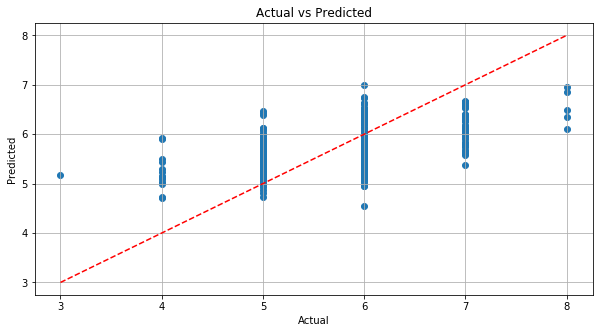

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 加载数据集
winequality = pd.read_csv('winequality-red.csv',sep=';')

# 指定自变量（特征变量）和因变量（目标变量）
X = winequality[['alcohol', 'volatile acidity']]
y = winequality['quality']

# 将数据集分割成训练集和测试集（75%训练集，25%测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 初始化线性回归模型
model = LinearRegression()

# 在训练集上训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算均方误差（Mean Squared Error）
mse = mean_squared_error(y_test, y_pred)

# 计算R^2分数
r2 = r2_score(y_test, y_pred)

# 打印性能评估结果
print("均方误差(MSE):", mse)
print("R^2分数:", r2)

# 绘制预测值与实际值的散点图
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

# 均方误差（Mean Squared Error，MSE）：该值衡量模型预测值与实际观测值之间的平方差的平均值。MSE值越低，表示模型的预测性能越好。

# R^2分数：R^2分数是拟合优度的一种度量，表示模型对目标变量方差的解释程度。该值范围从0到1，越接近1表示模型拟合得越好。

For alcohol content vs quality:
Mean Squared Error (MSE): 0.500440569178
R^2 Score: 0.19100286872

For volatile acidity vs quality:
Mean Squared Error (MSE): 0.502715093691
R^2 Score: 0.18732594099


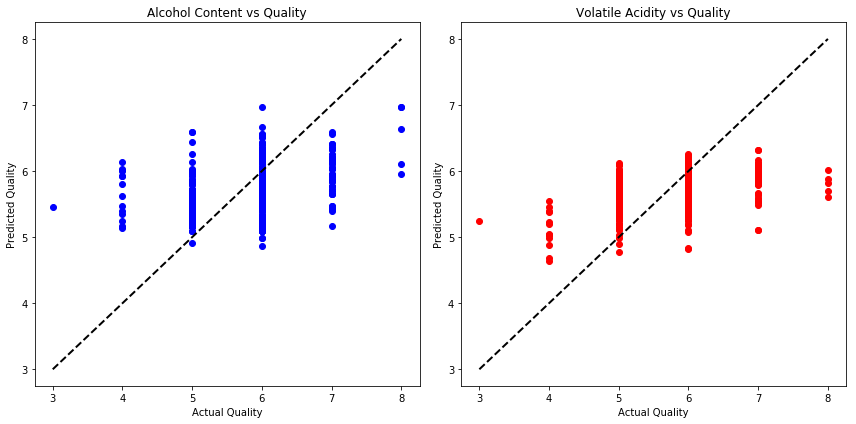

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 加载数据集
winequality = pd.read_csv('winequality-red.csv', sep=';')

# 提取特征和标签
X_alcohol = winequality['alcohol'].values.reshape(-1, 1)
X_volatile_acidity = winequality['volatile acidity'].values.reshape(-1, 1)
y = winequality['quality']

# 将数据集按75%和25%的比例分成训练集和测试集
X_alcohol_train, X_alcohol_test, y_train, y_test = train_test_split(X_alcohol, y, test_size=0.25, random_state=42)
X_volatile_acidity_train, X_volatile_acidity_test, _, _ = train_test_split(X_volatile_acidity, y, test_size=0.25, random_state=42)

# 创建线性回归模型并在训练集上进行训练
reg_alcohol = LinearRegression().fit(X_alcohol_train, y_train)
reg_volatile_acidity = LinearRegression().fit(X_volatile_acidity_train, y_train)

# 在测试集上进行预测
y_pred_alcohol = reg_alcohol.predict(X_alcohol_test)
y_pred_volatile_acidity = reg_volatile_acidity.predict(X_volatile_acidity_test)

# 计算性能评估指标
mse_alcohol = mean_squared_error(y_test, y_pred_alcohol)
mse_volatile_acidity = mean_squared_error(y_test, y_pred_volatile_acidity)
r2_alcohol = r2_score(y_test, y_pred_alcohol)
r2_volatile_acidity = r2_score(y_test, y_pred_volatile_acidity)

print("For alcohol content vs quality:")
print("Mean Squared Error (MSE):", mse_alcohol)
print("R^2 Score:", r2_alcohol)
print()
print("For volatile acidity vs quality:")
print("Mean Squared Error (MSE):", mse_volatile_acidity)
print("R^2 Score:", r2_volatile_acidity)


# 绘制预测值与实际值的散点图
plt.figure(figsize=(12, 6))

# 绘制酒精含量与质量的散点图
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_alcohol, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Alcohol Content vs Quality')

# 绘制挥发性酸与质量的散点图
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_volatile_acidity, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Volatile Acidity vs Quality')

plt.tight_layout()
plt.show()


### 5、思考：该如果改进模型学习的效果？

In [ ]:
#有几种方法可以尝试改进模型学习的效果：

#（1）特征工程：尝试添加新的特征或进行特征转换，以提供更多信息给模型。您可以尝试创建交互特征，多项式特征或使用特征选择技术来选择最相关的特征。

#（2）模型选择：除了线性回归模型，您可以尝试其他类型的模型，如决策树、随机森林、支持向量机等。不同类型的模型可能会对数据的特性有不同的适应性。

#（3）调整超参数：如果您选择了一个复杂的模型，如随机森林或支持向量机，您可以尝试调整其超参数来优化模型的性能。可以使用交叉验证来选择最佳的超参数组合。

#（4）集成学习：尝试使用集成学习技术，如Bagging、Boosting或Stacking，将多个模型的预测结果结合起来，以提高整体性能。

#（5）处理异常值和缺失值：检测和处理异常值，以及填补缺失值，有助于提高模型的稳健性和泛化能力。

#（6）正则化：对于线性模型，可以尝试使用L1正则化（Lasso）或L2正则化（Ridge）来防止过拟合，并提高模型的泛化能力。

#（7）集成特征选择：使用特征选择技术来筛选出最具预测性的特征，可以提高模型的效果，并减少模型的复杂性。

#（8）数据增强：对于较小的数据集，可以尝试使用数据增强技术来生成额外的训练样本，以增加模型的泛化能力。

In [6]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# 加载数据集
winequality = pd.read_csv('winequality-red.csv', sep=';')

# 准备自变量(特征值)和目标变量
X = winequality[['alcohol', 'volatile acidity']]
y = winequality['quality']

# 初始化线性回归模型
model = LinearRegression()

# 定义K折交叉验证的折数
k = 5

# 初始化KFold对象
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 执行交叉验证
cv_scores = cross_val_score(model, X, y, cv=kf)

# 计算并打印平均得分和标准差
mean_score = cv_scores.mean()
std_score = cv_scores.std()
print(f"交叉验证{k}-折得分: {cv_scores}")
print(f"均方误差(MSE): {mean_score:.2f}")
print(f"R^2分数: {std_score:.2f}")


交叉验证5-折得分: [ 0.36074616  0.21523087  0.26206233  0.31444382  0.42258887]
均方误差(MSE): 0.32
R^2分数: 0.07
